## Import and subjects

In [1]:
import mne
from anlffr.helper import biosemi2mne as bs
import sys
import warnings
from anlffr.preproc import find_blinks
from matplotlib import pyplot as plt
from mne import compute_proj_epochs
from mne import concatenate_epochs
import pylab as pl
import numpy as np
import fnmatch
import os


In [2]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype'] = 42  
plt.rcParams['svg.fonttype'] = 'none'

In [3]:
HL_subjects = ['HL002', 'HL004', 'HL005', 'HL008', 'HL010', 'HL007']
NH_subjects = ['SP003', 'SP004', 'SP005', 'SP006', 'SP007', 'SP008' , 'HR']

fpath = '/Users/sharadhib/Library/CloudStorage/OneDrive-UniversityofPittsburgh/Attachments/Attention_EEG/'
subjects = ['HL002', 'HL004', 'HL005', 'HL008', 'HL010', 'HL007', 'SP003', 'SP004', 'SP005', 'SP006', 'SP007', 'SP008' , 'HR']

In [15]:
# resultsdir = 'results/'

# for subj in subjects:
#     print(subj)
#     leads = []
#     lags = []
    
#     channels_to_drop = ['GSR1', 'GSR2', 'Erg1', 'Erg2', 'Resp', 'Plet', 'Temp']
    
#     bdfs = fnmatch.filter(os.listdir(fpath), subj + '_Att*.bdf')
#     print(bdfs)
    
#     for k, bdf in enumerate(bdfs):
#         if bdf == 'HL008_AttentionTask+004.bdf':
#             raw, eves = bs.importbdf(bdf, hptsname='biosemi10_20.hpts')
#             total = raw.times[-1]
#             end_time = total - 120
#             raw = raw.crop(tmin=0, tmax=end_time)
#         else:
#             raw, eves = bs.importbdf(bdf, hptsname='biosemi10_20.hpts')
#         print(f'Running file: {bdf}')
#         raw.notch_filter(np.arange(60, 241, 60), filter_length='auto', fir_design='firwin')
#         raw.filter(1, 40)

#         if subj == 'SP004':
#             raw.drop_channels(channels_to_drop)

#         blinks = find_blinks(raw, ch_name=['Fp1'])
#         if subj in ['HR', 'SP004', 'HL004', 'HL010', 'HL007']:
#             if k == 0:
#                 epochs_blinks = mne.Epochs(raw, blinks, event_id=998, baseline=(-0.25, 0.25),
#                                         reject=dict(eeg=500e-6), tmin=-0.25, tmax=0.25)
#                 blink_proj = compute_proj_epochs(epochs_blinks, n_eeg=2)
            
#             raw.add_proj(blink_proj)
#             #raw.del_proj(1)
#             raw.apply_proj()
        
#         else:
#             if k == 0:
#                 epochs_blinks = mne.Epochs(raw, blinks, event_id=998, baseline=(-0.25, 0.25),
#                                         reject=dict(eeg=500e-6), tmin=-0.25, tmax=0.25)
#                 blink_proj = compute_proj_epochs(epochs_blinks, n_eeg=3)
            
#             raw.add_proj(blink_proj)
#             raw.del_proj(1)
#             raw.apply_proj()
    
#         events_lead = [7,9]
#         events_lead_use = [event_lead for event_lead in events_lead if event_lead in eves[:,2]]
        
#         events_lag = [8,10]
#         events_lag_use = [event_lag for event_lag in events_lag if event_lag in eves[:,2]]
    
#         if events_lead_use:
#             epochs_lead = mne.Epochs(raw, eves, event_id=events_lead_use, baseline=(-0.5, 0.0), proj=True,
#                             tmin=-0.5, tmax=5, reject=dict(eeg=200e-6))
#         if events_lag_use:
#             epochs_lag = mne.Epochs(raw, eves, event_id=events_lag_use, baseline=(-0.5, 0.0), proj=True,
#                             tmin=-0.5, tmax=5, reject=dict(eeg=200e-6))
#         leads += [epochs_lead, ]
#         lags += [epochs_lag, ]
    
#     lead = concatenate_epochs(leads)
#     lag = concatenate_epochs(lags)    

#     evoked_lead = lead.average()
#     evoked_lag = lag.average()

#     fname_left = fpath+resultsdir+subj + '_evoked_lead_ave.fif'
#     fname_right = fpath+resultsdir+subj + '_evoked_lag_ave.fif'

#     evoked_lead.save(fname_left,overwrite=True)
#     evoked_lag.save(fname_right, overwrite=True)


In [11]:
foldername = '/Users/sharadhib/Library/CloudStorage/Box-Box/SNAPlab/AAS_abstract/'

### Evoked NH

In [ ]:
evoked_leads_NH = [f'{subject_id}_evoked_lead_ave.fif' for subject_id in NH_subjects]
evoked_lags_NH = [f'{subject_id}_evoked_lag_ave.fif' for subject_id in NH_subjects]

base_path = "/Users/sharadhib/Library/CloudStorage/OneDrive-UniversityofPittsburgh/Attachments/Attention_EEG/results/"

evoked_leads_1_NH = [base_path + filename for filename in evoked_leads_NH]
evoked_lags_1_NH = [base_path + filename for filename in evoked_lags_NH]

evoked_lead_NH = [mne.read_evokeds(leads)[0] for leads in evoked_leads_1_NH]
evoked_lag_NH = [mne.read_evokeds(lags)[0] for lags in evoked_lags_1_NH]

average_evoked_lead_NH = mne.grand_average(evoked_lead_NH)
average_evoked_lag_NH = mne.grand_average(evoked_lag_NH)

x_NH = average_evoked_lead_NH.data*1e6
y_NH = average_evoked_lag_NH.data*1e6

sum_x = 0
sum_y = 0
for i in [30,31,4,25]:
    sum_x += x_NH[i,]
    sum_y += y_NH[i,]
z = np.asarray((sum_x/4, sum_y/4))
time = np.linspace(-0.5, 5, x_NH.shape[1])

fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(time, z[0], linewidth=1.5, color='red', label='Evoked Lead') 
ax.plot(time, z[1], linewidth=1.5, color='black', label='Evoked Lag')
# ax.axvline(x=0.4, linestyle='--', linewidth=0.75, color='blue')  
for x_val in [2.1, 2.6, 3.1, 3.6, 4.1]:
    ax.axvline(x=x_val, linestyle='--', linewidth=0.75, color='red')
for x_val in [2.35, 2.85, 3.35, 3.85, 4.35]:
    ax.axvline(x=x_val, linestyle='--', linewidth=0.75, color='black')
ax.set_xlabel('Time (s)', fontsize=14)
ax.set_ylabel('Evoked Potential(µV)', fontsize=14)
ax.legend(['Attend Lead', 'Attend Lag'], loc='upper left')
plt.savefig(foldername+'Evoked_NH.pdf', format='pdf')
plt.show()

### Evoked HL

In [ ]:
evoked_leads_HL = [f'{subject_id}_evoked_lead_ave.fif' for subject_id in HL_subjects]
evoked_lags_HL = [f'{subject_id}_evoked_lag_ave.fif' for subject_id in HL_subjects]

# base_path = '/Users/sharadhib/Library/CloudStorage/OneDrive-UniversityofPittsburgh/Attachments/Attention_EEG/results/'
base_path = "/Users/sharadhib/Library/CloudStorage/OneDrive-UniversityofPittsburgh/Attachments/Attention_EEG/results/"

evoked_leads_1_HL = [base_path + filename for filename in evoked_leads_HL]
evoked_lags_1_HL = [base_path + filename for filename in evoked_lags_HL]

evoked_lead_HL = [mne.read_evokeds(leads)[0] for leads in evoked_leads_1_HL]
evoked_lag_HL = [mne.read_evokeds(lags)[0] for lags in evoked_lags_1_HL]

average_evoked_lead_HL = mne.grand_average(evoked_lead_HL)
average_evoked_lag_HL = mne.grand_average(evoked_lag_HL)

x_HL = average_evoked_lead_HL.data*1e6
y_HL = average_evoked_lag_HL.data*1e6

sum_x = 0
sum_y = 0
for i in [30,31,4,25]:
    sum_x += x_HL[i,]
    sum_y += y_HL[i,]
z = np.asarray((sum_x/4, sum_y/4))
time = np.linspace(-0.5, 5, x_HL.shape[1])

fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(time, z[0], linewidth=1.5, color='red', label='Evoked Lead') 
ax.plot(time, z[1], linewidth=1.5, color='black', label='Evoked Lag')  
for x_val in [2.1, 2.6, 3.1, 3.6, 4.1]:
    ax.axvline(x=x_val, linestyle='--', linewidth=0.75, color='red')
for x_val in [2.35, 2.85, 3.35, 3.85, 4.35]:
    ax.axvline(x=x_val, linestyle='--', linewidth=0.75, color='black')
ax.set_xlabel('Time (s)', fontsize=14)
ax.set_ylabel('Evoked Potential(µV)', fontsize=14)
ax.legend(['Attend Lead', 'Attend Lag'], loc='upper left')
plt.savefig(foldername+'Evoked_HL.pdf', format='pdf')
plt.show()

### All subjects evoked

In [ ]:
evoked_leads_HL = [f'{subject_id}_evoked_lead_ave.fif' for subject_id in subjects]
evoked_lags_HL = [f'{subject_id}_evoked_lag_ave.fif' for subject_id in subjects]

# base_path = '/Users/sharadhib/Library/CloudStorage/OneDrive-UniversityofPittsburgh/Attachments/Attention_EEG/results/'
base_path = "/Users/sharadhib/Library/CloudStorage/OneDrive-UniversityofPittsburgh/Attachments/Attention_EEG/results/"

evoked_leads_1_HL = [base_path + filename for filename in evoked_leads_HL]
evoked_lags_1_HL = [base_path + filename for filename in evoked_lags_HL]

evoked_lead_HL = [mne.read_evokeds(leads)[0] for leads in evoked_leads_1_HL]
evoked_lag_HL = [mne.read_evokeds(lags)[0] for lags in evoked_lags_1_HL]

average_evoked_lead_HL = mne.grand_average(evoked_lead_HL)
average_evoked_lag_HL = mne.grand_average(evoked_lag_HL)

x_HL = average_evoked_lead_HL.data*1e6
y_HL = average_evoked_lag_HL.data*1e6

sum_x = 0
sum_y = 0
for i in [30,31,4,25]:
    sum_x += x_HL[i,]
    sum_y += y_HL[i,]
z = np.asarray((sum_x/4, sum_y/4))
time = np.linspace(-0.5, 5, x_HL.shape[1])

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(time, z[0], linewidth=1.5, color='red', label='Evoked Lead') 
ax.plot(time, z[1], linewidth=1.5, color='black', label='Evoked Lag')  
for x_val in [2.1, 2.6, 3.1, 3.6, 4.1]:
    ax.axvline(x=x_val, linestyle='--', linewidth=0.75, color='red')
for x_val in [2.35, 2.85, 3.35, 3.85, 4.35]:
    ax.axvline(x=x_val, linestyle='--', linewidth=0.75, color='black')
ax.set_xlabel('Time (s)', fontsize=14)
ax.set_ylabel('Evoked Potential(µV)', fontsize=14)
ax.legend(['Attend Lead', 'Attend Lag'], loc='upper left')
plt.show()

## RMS

### RMS NH

In [ ]:
evoked_leads_NH = [f'{subject_id}_evoked_lead_ave.fif' for subject_id in NH_subjects]
evoked_lags_NH = [f'{subject_id}_evoked_lag_ave.fif' for subject_id in NH_subjects]

base_path = "/Users/sharadhib/Library/CloudStorage/OneDrive-UniversityofPittsburgh/Attachments/Attention_EEG/results/"

evoked_leads_1_NH = [base_path + filename for filename in evoked_leads_NH]
evoked_lags_1_NH = [base_path + filename for filename in evoked_lags_NH]

evoked_lead_NH = [mne.read_evokeds(leads)[0] for leads in evoked_leads_1_NH]
evoked_lag_NH = [mne.read_evokeds(lags)[0] for lags in evoked_lags_1_NH]

evoked_crop_lead_NH = [evk.crop(tmin=2.35, tmax=4.35) for evk in evoked_lead_NH]
evoked_crop_lag_NH = [evk.crop(tmin=2.35, tmax=4.35) for evk in evoked_lag_NH]

selected_channels = [30, 31, 4, 25]

average_evoked_lead_NH = mne.grand_average(evoked_crop_lead_NH)
average_evoked_lag_NH = mne.grand_average(evoked_crop_lag_NH)

mean_squared_diff = (average_evoked_lead_NH.data - average_evoked_lag_NH.data) ** 2

mean_denominator = (average_evoked_lead_NH.data ** 2 + average_evoked_lag_NH.data ** 2) / 2

mean_squared_diff_avg = np.mean(mean_squared_diff[selected_channels])
mean_denominator_avg = np.mean(mean_denominator[selected_channels])

mean_normalized_change_NH = mean_squared_diff_avg / mean_denominator_avg

change_loo_gavg_NH = []
normalized_change_loo_gavg_NH = []
S = len(NH_subjects)

for i in range(len(NH_subjects)):
    loo_subset_leads_NH = evoked_crop_lead_NH[:i] + evoked_crop_lead_NH[i+1:]
    loo_subset_lags_NH = evoked_crop_lag_NH[:i] + evoked_crop_lag_NH[i+1:]

    loo_average_evoked_lead_NH = mne.grand_average(loo_subset_leads_NH)
    loo_average_evoked_lag_NH = mne.grand_average(loo_subset_lags_NH)

    squared_diff = (loo_average_evoked_lead_NH.data - loo_average_evoked_lag_NH.data) ** 2

    denominator = (loo_average_evoked_lead_NH.data ** 2 + loo_average_evoked_lag_NH.data ** 2) / 2

    squared_diff_avg = np.mean(squared_diff[selected_channels])
    denominator_avg = np.mean(denominator[selected_channels])

    normalized_change_loo = np.sqrt(squared_diff_avg) / np.sqrt(denominator_avg)

    normalized_change_loo_gavg_NH.append(normalized_change_loo)

loo_normalized_change_gavg_NH_var = np.var(normalized_change_loo_gavg_NH)
loo_normalized_change_gavg_NH_std = np.sqrt(loo_normalized_change_gavg_NH_var)
loo_normalized_change_gavg_NH_sem = loo_normalized_change_gavg_NH_std / np.sqrt(len(NH_subjects))

# jackknife_mean_NH = np.mean(normalized_change_loo_gavg_NH)
# jackknife_variance_NH = (S - 1) / S * np.sum((normalized_change_loo_gavg_NH - jackknife_mean_NH) ** 2)
# jackknife_std_NH = np.sqrt(jackknife_variance_NH)
# jackknife_sem_NH = jackknife_std_NH / np.sqrt(S)

### RMS HL

In [ ]:
evoked_leads_HL = [f'{subject_id}_evoked_lead_ave.fif' for subject_id in HL_subjects]
evoked_lags_HL = [f'{subject_id}_evoked_lag_ave.fif' for subject_id in HL_subjects]

base_path = "/Users/sharadhib/Library/CloudStorage/OneDrive-UniversityofPittsburgh/Attachments/Attention_EEG/results/"

evoked_leads_1_HL = [base_path + filename for filename in evoked_leads_HL]
evoked_lags_1_HL = [base_path + filename for filename in evoked_lags_HL]

evoked_lead_HL = [mne.read_evokeds(leads)[0] for leads in evoked_leads_1_HL]
evoked_lag_HL = [mne.read_evokeds(lags)[0] for lags in evoked_lags_1_HL]

evoked_crop_lead_HL = [evk.crop(tmin=2.35, tmax=4.35) for evk in evoked_lead_HL]
evoked_crop_lag_HL = [evk.crop(tmin=2.35, tmax=4.35) for evk in evoked_lag_HL]

selected_channels = [30, 31, 4, 25]

average_evoked_lead_HL = mne.grand_average(evoked_crop_lead_NH)
average_evoked_lag_HL = mne.grand_average(evoked_crop_lag_NH)

mean_squared_diff = (average_evoked_lead_NH.data - average_evoked_lag_NH.data) ** 2

mean_denominator = (average_evoked_lead_NH.data ** 2 + average_evoked_lag_NH.data ** 2) / 2

mean_squared_diff_avg = np.mean(mean_squared_diff[selected_channels])
mean_denominator_avg = np.mean(mean_denominator[selected_channels])

mean_normalized_change_HL = mean_squared_diff_avg / mean_denominator_avg

change_loo_gavg_HL = []
normalized_change_loo_gavg_HL = []
S = len(HL_subjects)

for i in range(len(HL_subjects)):
    loo_subset_leads_HL = evoked_crop_lead_HL[:i] + evoked_crop_lead_HL[i+1:]
    loo_subset_lags_HL = evoked_crop_lag_HL[:i] + evoked_crop_lag_HL[i+1:]

    average_evoked_lead_HL = mne.grand_average(loo_subset_leads_HL)
    average_evoked_lag_HL = mne.grand_average(loo_subset_lags_HL)

    squared_diff = (average_evoked_lead_HL.data - average_evoked_lag_HL.data) ** 2

    denominator = (average_evoked_lead_HL.data ** 2 + average_evoked_lag_HL.data ** 2) / 2

    squared_diff_avg = np.mean(squared_diff[selected_channels])
    denominator_avg = np.mean(denominator[selected_channels])

    normalized_change_loo = np.sqrt(squared_diff_avg) / np.sqrt(denominator_avg)

    normalized_change_loo_gavg_HL.append(normalized_change_loo)

loo_normalized_change_gavg_HL_var = np.var(normalized_change_loo_gavg_HL)
loo_normalized_change_gavg_HL_std = np.sqrt(loo_normalized_change_gavg_HL_var)
loo_normalized_change_gavg_HL_sem = loo_normalized_change_gavg_HL_std / np.sqrt(len(HL_subjects))

jackknife_mean_HL = np.mean(normalized_change_loo_gavg_HL)

jackknife_variance_HL = (S - 1) / S * np.sum((normalized_change_loo_gavg_HL - jackknife_mean_HL) ** 2)

jackknife_std_HL = np.sqrt(jackknife_variance_HL)

jackknife_sem_HL = jackknife_std_HL / np.sqrt(S)

In [ ]:
x_labels = ["Normal Hearing", "Hearing Loss"] 
x_positions = np.arange(len(x_labels))

mean_changes = [np.mean(normalized_change_loo_gavg_NH), np.mean(normalized_change_loo_gavg_HL)]

sem_values = [loo_normalized_change_gavg_NH_sem, loo_normalized_change_gavg_HL_sem]

plt.figure(figsize=(7, 5))
plt.errorbar(x_positions, mean_changes, yerr=sem_values, fmt='s', capsize=5, color='black', markersize=8)
plt.xticks(x_positions, x_labels)  

plt.ylabel("Change in Energy (Attend Lead - Attend Lag)")
plt.yticks([1.02, 1.04, 1.06, 1.08, 1.10, 1.12, 1.14, 1.16, 1.18 ])
plt.title("Change in Energy during stimulus")
plt.savefig(foldername+'RMS_evoked.pdf', format='pdf')
plt.show()

In [11]:
# x_labels = ["Normal Hearing", "Hearing Loss"] 
# x_positions = np.arange(len(x_labels))

# mean_changes = [jackknife_mean_NH, jackknife_mean_HL]

# sem_values = [jackknife_sem_NH, jackknife_sem_HL]

# plt.figure(figsize=(7, 5))
# plt.errorbar(x_positions, mean_changes, yerr=sem_values, fmt='s', capsize=5, color='black', markersize=8)
# plt.xticks(x_positions, x_labels)  

# plt.ylabel("Change in Energy (Attend Lead - Attend Lag)")
# plt.title("Change in Energy during stimulus")
# plt.show()

### Load spectrogram data

In [4]:
res_fpath = '/Users/sharadhib/Library/CloudStorage/OneDrive-UniversityofPittsburgh/Attachments/Attention_EEG/results/'
HL_subjects = ['HL002', 'HL004', 'HL005', 'HL008', 'HL010', 'HL007']
NH_subjects = ['SP003', 'SP004', 'SP005', 'SP006', 'SP007', 'SP008' , 'HR']

In [5]:
file = '_norm_right_left_preprestim.npy'
file_dur = '_norm_right_left_dur.npy'

HL_sum_right_left_pre = np.zeros(32)
HL_sum_right_left_dur = np.zeros(32)

NH_sum_right_left_pre = np.zeros(32)
NH_sum_right_left_dur = np.zeros(32)

for subj in HL_subjects:
    print(res_fpath+subj+file)
    left_right_pre = np.load(res_fpath+subj+file)
    left_right_dur = np.load(res_fpath+subj+file_dur)
    HL_sum_right_left_pre += left_right_pre
    HL_sum_right_left_dur += left_right_dur
    
HL_avg_right_left_pre = HL_sum_right_left_pre/len(HL_subjects)
HL_avg_right_left_dur = HL_sum_right_left_dur/len(HL_subjects)



/Users/sharadhib/Library/CloudStorage/OneDrive-UniversityofPittsburgh/Attachments/Attention_EEG/results/HL002_norm_right_left_preprestim.npy
/Users/sharadhib/Library/CloudStorage/OneDrive-UniversityofPittsburgh/Attachments/Attention_EEG/results/HL004_norm_right_left_preprestim.npy
/Users/sharadhib/Library/CloudStorage/OneDrive-UniversityofPittsburgh/Attachments/Attention_EEG/results/HL005_norm_right_left_preprestim.npy
/Users/sharadhib/Library/CloudStorage/OneDrive-UniversityofPittsburgh/Attachments/Attention_EEG/results/HL008_norm_right_left_preprestim.npy
/Users/sharadhib/Library/CloudStorage/OneDrive-UniversityofPittsburgh/Attachments/Attention_EEG/results/HL010_norm_right_left_preprestim.npy
/Users/sharadhib/Library/CloudStorage/OneDrive-UniversityofPittsburgh/Attachments/Attention_EEG/results/HL007_norm_right_left_preprestim.npy


In [6]:
for sub in NH_subjects:
    print(res_fpath+sub+file)
    left_right_pre = np.load(res_fpath+sub+file)
    left_right_dur = np.load(res_fpath+sub+file_dur)
    NH_sum_right_left_pre += left_right_pre
    NH_sum_right_left_dur += left_right_dur
    
NH_avg_right_left_pre = NH_sum_right_left_pre/len(NH_subjects)
NH_avg_right_left_dur = NH_sum_right_left_dur/len(NH_subjects)

/Users/sharadhib/Library/CloudStorage/OneDrive-UniversityofPittsburgh/Attachments/Attention_EEG/results/SP003_norm_right_left_preprestim.npy
/Users/sharadhib/Library/CloudStorage/OneDrive-UniversityofPittsburgh/Attachments/Attention_EEG/results/SP004_norm_right_left_preprestim.npy
/Users/sharadhib/Library/CloudStorage/OneDrive-UniversityofPittsburgh/Attachments/Attention_EEG/results/SP005_norm_right_left_preprestim.npy
/Users/sharadhib/Library/CloudStorage/OneDrive-UniversityofPittsburgh/Attachments/Attention_EEG/results/SP006_norm_right_left_preprestim.npy
/Users/sharadhib/Library/CloudStorage/OneDrive-UniversityofPittsburgh/Attachments/Attention_EEG/results/SP007_norm_right_left_preprestim.npy
/Users/sharadhib/Library/CloudStorage/OneDrive-UniversityofPittsburgh/Attachments/Attention_EEG/results/SP008_norm_right_left_preprestim.npy
/Users/sharadhib/Library/CloudStorage/OneDrive-UniversityofPittsburgh/Attachments/Attention_EEG/results/HR_norm_right_left_preprestim.npy


#### Load info

In [7]:
raw, eves = bs.importbdf('/Users/sharadhib/Library/CloudStorage/OneDrive-UniversityofPittsburgh/Attachments/Attention_EEG/HL004_AttentionTask+001.bdf', hptsname='/Users/sharadhib/Library/CloudStorage/OneDrive-UniversityofPittsburgh/Attachments/Attention_EEG/biosemi10_20.hpts')
# raw, eves = bs.importbdf('/Users/sharadhib/Library/CloudStorage/Box-Box/SNAPlab/Data/SP003_Att+001.bdf', hptsname='/Users/sharadhib/Library/CloudStorage/OneDrive-UniversityofPittsburgh/Attachments/Attention_EEG/biosemi10_20.hpts')
raw.notch_filter(np.arange(60, 241, 60), filter_length='auto', fir_design='firwin')
raw.filter(1, 20)

blinks = find_blinks(raw, ch_name=['Fp1'])
epochs_blinks = mne.Epochs(raw, blinks, event_id=998, baseline=(-0.25, 0.25),
                             reject=dict(eeg=500e-6), tmin=-0.25, tmax=0.25)
blink_proj = compute_proj_epochs(epochs_blinks, n_eeg=3)
raw.add_proj(blink_proj)
raw.del_proj(1)
epochs_left = mne.Epochs(raw, eves, event_id=[7,8], baseline=(-0.5, 0), proj=True,
                        tmin=-0.5, tmax=5, reject=dict(eeg=200e-6))

Extracting EDF parameters from /Users/sharadhib/Library/CloudStorage/OneDrive-UniversityofPittsburgh/Attachments/Attention_EEG/HL004_AttentionTask+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8716287  =      0.000 ...   532.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
109 events found on stim channel Status
Event IDs: [ 4  5  7  8  9 10 11]
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filte

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    3.3s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 54069 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.8s


Setting up band-pass filter from 0.5 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.15 Hz (-6 dB cutoff frequency: 0.42 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 360449 samples (22.000 s)

Not setting metadata
180 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
No channels 'grad' found. Skipping.
No channels 'mag' found. Skipping.
Adding projection: eeg-998--0.250-0.250-PCA-01 (exp var=88.1%)
Adding projection: eeg-998--0.250-0.250-PCA-02 (exp var=5.2%)
Adding projection: eeg-998--0.250-0.250-PCA-03 (exp var=2.9%)
3 projection items deactivated
Not setting metadata
19 matching events found
Applying baseline correc

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s


In [8]:
epochs_left

<Epochs | 19 events (good & bad), -0.5 – 5 s (baseline -0.5 – 0 s), ~64 kB, data not loaded,
 '7': 8
 '8': 11>

In [9]:
channels = ['Fp1','AF3','F7','F3','FC1','FC5','T7','C3','CP1','CP5','P7','P3','Pz','PO3',
 'O1','Oz','O2','PO4','P4','P8','CP6','CP2','C4','T8','FC6','FC2','F4','F8','AF4','Fp2','Fz','Cz']

epoch_pre_left = epochs_left.copy().load_data().crop(tmin=0.4, tmax=2.0)
epoch_dur_left = epochs_left.copy().load_data().crop(tmin=2.0, tmax=5.0)

info_pre_picked = mne.pick_info(epochs_left.info, mne.pick_channels(epochs_left.info['ch_names'], include =channels))
info_dur_picked = mne.pick_info(epochs_left.info, mne.pick_channels(epochs_left.info['ch_names'], include =channels))

Using data from preloaded Raw for 19 events and 90113 original time points ...
    Rejecting  epoch based on EEG : ['F3']
1 bad epochs dropped
Using data from preloaded Raw for 19 events and 90113 original time points ...
    Rejecting  epoch based on EEG : ['F3']
1 bad epochs dropped


### Plot Pre

#### HL

/var/folders/j3/th_68nl977j8d8xcjhyl34540000gn/T/ipykernel_27995/28778293.py:2: RuntimeWarning: Only 6 head digitization points of the specified kind ("extra",), fitting may be inaccurate
  im,_ = mne.viz.plot_topomap(HL_avg_right_left_pre, info_pre_picked, vlim=(-8,8), axes=ax, ch_type='eeg',show=False)
/var/folders/j3/th_68nl977j8d8xcjhyl34540000gn/T/ipykernel_27995/28778293.py:2: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size.
  im,_ = mne.viz.plot_topomap(HL_avg_right_left_pre, info_pre_picked, vlim=(-8,8), axes=ax, ch_type='eeg',show=False)


NameError: name 'foldername' is not defined

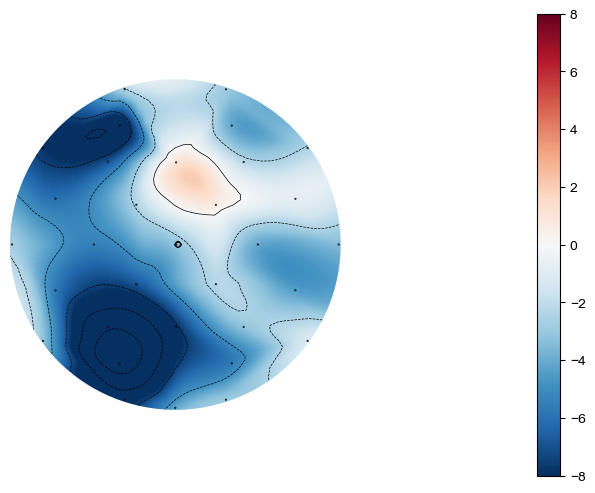

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
im,_ = mne.viz.plot_topomap(HL_avg_right_left_pre, info_pre_picked, vlim=(-8,8), axes=ax, ch_type='eeg',show=False)
plt.colorbar(im, ax=ax)
plt.savefig(foldername+'HL_preStim_613.pdf', format='pdf')
plt.show()

#### NH

/var/folders/j3/th_68nl977j8d8xcjhyl34540000gn/T/ipykernel_27995/1536292102.py:2: RuntimeWarning: Only 6 head digitization points of the specified kind ("extra",), fitting may be inaccurate
  im,_ = mne.viz.plot_topomap(NH_avg_right_left_pre, info_pre_picked, vlim=(-8,8), axes=ax, ch_type='eeg',show=False)
/var/folders/j3/th_68nl977j8d8xcjhyl34540000gn/T/ipykernel_27995/1536292102.py:2: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size.
  im,_ = mne.viz.plot_topomap(NH_avg_right_left_pre, info_pre_picked, vlim=(-8,8), axes=ax, ch_type='eeg',show=False)


NameError: name 'foldername' is not defined

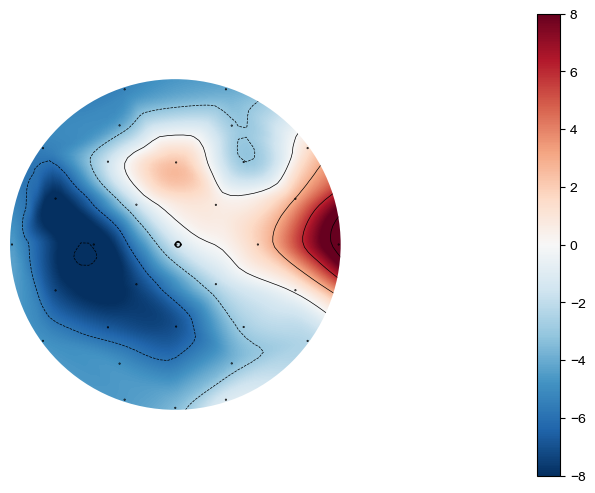

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
im,_ = mne.viz.plot_topomap(NH_avg_right_left_pre, info_pre_picked, vlim=(-8,8), axes=ax, ch_type='eeg',show=False)
plt.colorbar(im, ax=ax)
plt.savefig(foldername+'NH_preStim_613.pdf', format='pdf')
plt.show()

### All subjects alpha pre

/var/folders/j3/th_68nl977j8d8xcjhyl34540000gn/T/ipykernel_27995/1764821835.py:4: RuntimeWarning: Only 6 head digitization points of the specified kind ("extra",), fitting may be inaccurate
  im,_ = mne.viz.plot_topomap(avg_right_left_pre, info_pre_picked, vlim=(-8,8), names=channels,  axes=ax, ch_type='eeg',show=False)
/var/folders/j3/th_68nl977j8d8xcjhyl34540000gn/T/ipykernel_27995/1764821835.py:4: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size.
  im,_ = mne.viz.plot_topomap(avg_right_left_pre, info_pre_picked, vlim=(-8,8), names=channels,  axes=ax, ch_type='eeg',show=False)


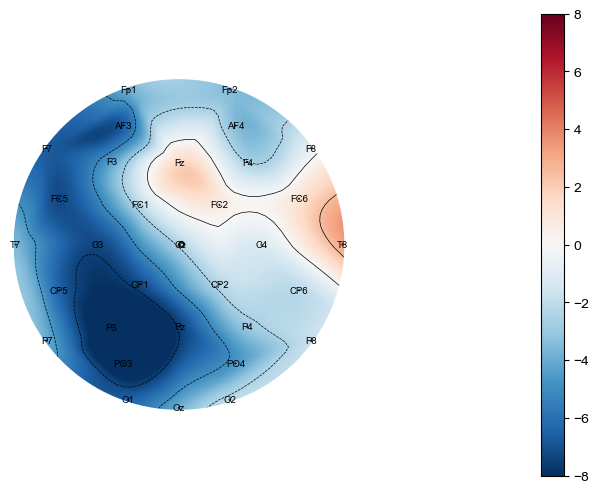

In [12]:
avg_right_left_pre = (NH_avg_right_left_pre + HL_avg_right_left_pre)/2

fig, ax = plt.subplots(figsize=(8, 6))
im,_ = mne.viz.plot_topomap(avg_right_left_pre, info_pre_picked, vlim=(-8,8), names=channels,  axes=ax, ch_type='eeg',show=False)
plt.colorbar(im, ax=ax)
plt.show()


### Plot During

#### NH

/var/folders/j3/th_68nl977j8d8xcjhyl34540000gn/T/ipykernel_27995/1215770973.py:2: RuntimeWarning: Only 6 head digitization points of the specified kind ("extra",), fitting may be inaccurate
  im,_ = mne.viz.plot_topomap(NH_avg_right_left_dur, info_pre_picked, vlim=(-8,8), axes=ax, ch_type='eeg',show=False)
/var/folders/j3/th_68nl977j8d8xcjhyl34540000gn/T/ipykernel_27995/1215770973.py:2: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size.
  im,_ = mne.viz.plot_topomap(NH_avg_right_left_dur, info_pre_picked, vlim=(-8,8), axes=ax, ch_type='eeg',show=False)


NameError: name 'foldername' is not defined

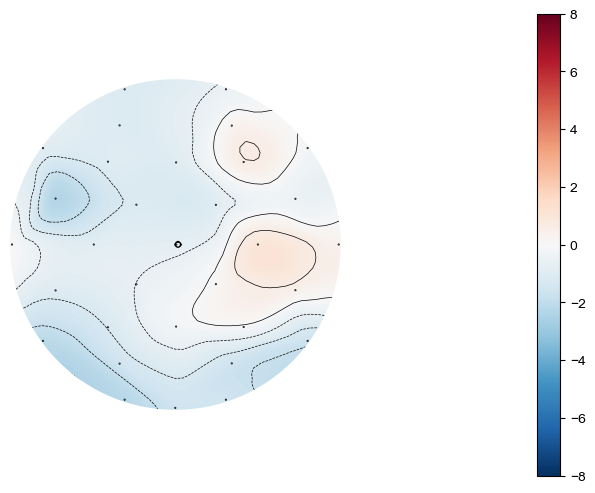

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))
im,_ = mne.viz.plot_topomap(NH_avg_right_left_dur, info_pre_picked, vlim=(-8,8), axes=ax, ch_type='eeg',show=False)
plt.colorbar(im, ax=ax)
plt.savefig(foldername+'NH_durStim_613.pdf', format='pdf')
plt.show()

#### HL

/var/folders/j3/th_68nl977j8d8xcjhyl34540000gn/T/ipykernel_27995/666488669.py:2: RuntimeWarning: Only 6 head digitization points of the specified kind ("extra",), fitting may be inaccurate
  im,_ = mne.viz.plot_topomap(HL_avg_right_left_dur, info_pre_picked, vlim=(-8,8),  axes=ax, ch_type='eeg',show=False)
/var/folders/j3/th_68nl977j8d8xcjhyl34540000gn/T/ipykernel_27995/666488669.py:2: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size.
  im,_ = mne.viz.plot_topomap(HL_avg_right_left_dur, info_pre_picked, vlim=(-8,8),  axes=ax, ch_type='eeg',show=False)


NameError: name 'foldername' is not defined

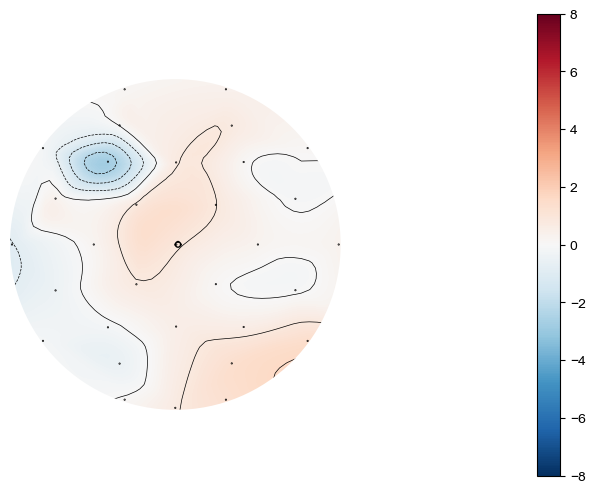

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))
im,_ = mne.viz.plot_topomap(HL_avg_right_left_dur, info_pre_picked, vlim=(-8,8),  axes=ax, ch_type='eeg',show=False)
plt.colorbar(im, ax=ax)
plt.savefig(foldername+'HL_durStim_613.pdf', format='pdf')
plt.show()

### All subjects alpha during 

/var/folders/j3/th_68nl977j8d8xcjhyl34540000gn/T/ipykernel_27995/2436121012.py:4: RuntimeWarning: Only 6 head digitization points of the specified kind ("extra",), fitting may be inaccurate
  im,_ = mne.viz.plot_topomap(avg_right_left_dur, info_pre_picked, vlim=(-8,8), names=channels,  axes=ax, ch_type='eeg',show=False)
/var/folders/j3/th_68nl977j8d8xcjhyl34540000gn/T/ipykernel_27995/2436121012.py:4: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size.
  im,_ = mne.viz.plot_topomap(avg_right_left_dur, info_pre_picked, vlim=(-8,8), names=channels,  axes=ax, ch_type='eeg',show=False)


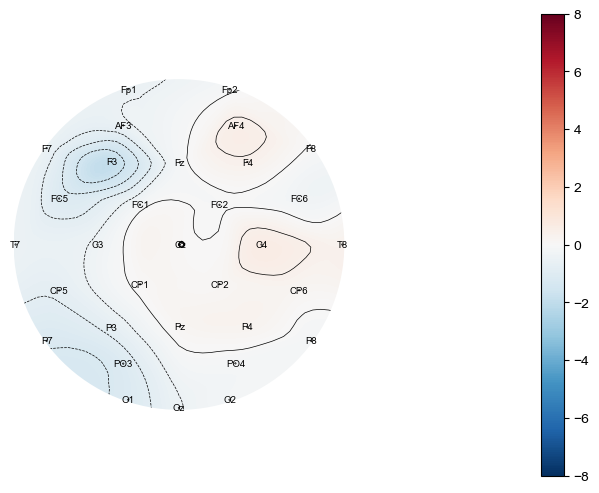

In [15]:
avg_right_left_dur = (HL_avg_right_left_dur + NH_avg_right_left_dur)/2

fig, ax = plt.subplots(figsize=(8, 6))
im,_ = mne.viz.plot_topomap(avg_right_left_dur, info_pre_picked, vlim=(-8,8), names=channels,  axes=ax, ch_type='eeg',show=False)
plt.colorbar(im, ax=ax)
plt.show()

### Assymetry 

In [16]:
PO_left = [10,11,13,14]
PO_right = [19,18,17,16]

NH_assymetry_pre = np.mean(NH_avg_right_left_pre[PO_right] - NH_avg_right_left_pre[PO_left])

NH_assymtery_dur = np.mean(NH_avg_right_left_dur[PO_right] - NH_avg_right_left_dur[PO_left])

HL_assymetry_pre = np.mean(HL_avg_right_left_pre[PO_right] - HL_avg_right_left_pre[PO_left])

HL_assymtery_dur = np.mean(HL_avg_right_left_dur[PO_right] - HL_avg_right_left_dur[PO_left])

In [17]:
file = '_norm_right_left_preprestim.npy'
file_dur = '_norm_right_left_dur.npy'

NH_assymetry_PO_pre = []
NH_assymetry_PO_dur = []
for subj in NH_subjects:
    left_right_pre = np.load(res_fpath+subj+file)
    left_right_dur = np.load(res_fpath+subj+file_dur)
    NH_sub_assymetry_PO_pre = np.mean(left_right_pre[PO_right] - left_right_pre[PO_left])
    NH_sub_assymetry_PO_dur = np.mean(left_right_dur[PO_right] - left_right_dur[PO_left])
    NH_assymetry_PO_pre.append(NH_sub_assymetry_PO_pre)
    NH_assymetry_PO_dur.append(NH_sub_assymetry_PO_dur)

NH_assymetry_PO_pre = np.array(NH_assymetry_PO_pre)
NH_assymetry_PO_dur = np.array(NH_assymetry_PO_dur)

In [19]:
HL_assymetry_PO_pre = []
HL_assymetry_PO_dur = []
for subj in HL_subjects:
    left_right_pre = np.load(res_fpath+subj+file)
    left_right_dur = np.load(res_fpath+subj+file_dur)
    HL_sub_assymetry_PO_pre = np.mean(left_right_pre[PO_right] - left_right_pre[PO_left])
    HL_sub_assymetry_PO_dur = np.mean(left_right_dur[PO_right] - left_right_dur[PO_left])
    HL_assymetry_PO_pre.append(HL_sub_assymetry_PO_pre)
    HL_assymetry_PO_dur.append(HL_sub_assymetry_PO_dur)

HL_assymetry_PO_pre = np.array(HL_assymetry_PO_pre)
HL_assymetry_PO_dur = np.array(HL_assymetry_PO_dur)

In [20]:
NH_assymetry_PO_pre_var = np.var(NH_assymetry_PO_pre)
NH_assymetry_PO_pre_std = np.sqrt(NH_assymetry_PO_pre_var)
NH_assymetry_PO_pre_sem = NH_assymetry_PO_pre_std / np.sqrt(len(NH_subjects))

NH_assymetry_PO_dur_var = np.var(NH_assymetry_PO_dur)
NH_assymetry_PO_dur_std = np.sqrt(NH_assymetry_PO_dur_var)
NH_assymetry_PO_dur_sem = NH_assymetry_PO_dur_std / np.sqrt(len(NH_subjects))

HL_assymetry_PO_pre_var = np.var(HL_assymetry_PO_pre)
HL_assymetry_PO_pre_std = np.sqrt(HL_assymetry_PO_pre_var)
HL_assymetry_PO_pre_sem = HL_assymetry_PO_pre_std / np.sqrt(len(HL_subjects))

HL_assymetry_PO_dur_var = np.var(HL_assymetry_PO_dur)
HL_assymetry_PO_dur_std = np.sqrt(HL_assymetry_PO_dur_var)
HL_assymetry_PO_dur_sem = HL_assymetry_PO_dur_std / np.sqrt(len(HL_subjects))

In [ ]:
sem_values = [NH_assymetry_PO_pre_sem, NH_assymetry_PO_dur_sem, HL_assymetry_PO_pre_sem, HL_assymetry_PO_dur_sem]
sem_values

In [ ]:
NH_assymetry_PO_pre

In [ ]:
[np.mean(NH_assymetry_PO_dur), np.mean(HL_assymetry_PO_dur)]

In [ ]:
# x_labels = ["Normal Hearing Pre-Stim", "Normal Hearing Dur-Stim", "Hearing Loss Pre-Stim", "Hearing Loss Dur-Stim"] 
x_labels = ["Normal Hearing Pre-Stim", "Hearing Loss Pre-Stim", "Normal Hearing Dur-Stim", "Hearing Loss Dur-Stim"] 
x_positions = np.arange(len(x_labels))

# mean_changes = [np.mean(NH_assymetry_PO_pre), np.mean(NH_assymetry_PO_dur),np.mean(HL_assymetry_PO_pre), np.mean(HL_assymetry_PO_dur)]
mean_changes = [np.mean(NH_assymetry_PO_pre), np.mean(HL_assymetry_PO_pre),np.mean(NH_assymetry_PO_dur), np.mean(HL_assymetry_PO_dur)]

# sem_values = [NH_assymetry_PO_pre_sem, NH_assymetry_PO_dur_sem, HL_assymetry_PO_pre_sem, HL_assymetry_PO_dur_sem]
sem_values = [NH_assymetry_PO_pre_sem, HL_assymetry_PO_pre_sem, NH_assymetry_PO_dur_sem, HL_assymetry_PO_dur_sem]

plt.figure(figsize=(12, 5))
plt.errorbar(x_positions, mean_changes, yerr=sem_values, fmt='s', capsize=5, color='black', markersize=8)
plt.xticks(x_positions, x_labels)  
plt.yticks([-2,0,2,4,6,8,10])

plt.ylabel("Alpha Power Asymetry")
# plt.title("Change in Energy during stimulus")
# plt.savefig(foldername+'alpha_power_assymetry.pdf', format='pdf')
plt.show()

In [25]:
from scipy.stats import ttest_ind_from_stats

t_stat_pre, p_value_pre = ttest_ind_from_stats(np.mean(NH_assymetry_PO_pre), NH_assymetry_PO_pre_var**0.5, len(NH_subjects), np.mean(HL_assymetry_PO_pre), HL_assymetry_PO_pre_var**0.5, len(HL_subjects), equal_var=False)
t_stat_dur, p_value_dur = ttest_ind_from_stats(np.mean(NH_assymetry_PO_dur), NH_assymetry_PO_dur_var**0.5, len(NH_subjects), np.mean(HL_assymetry_PO_dur), HL_assymetry_PO_dur_var**0.5, len(HL_subjects), equal_var=False)

In [ ]:
print(p_value_pre, p_value_dur)

#### Asymmetry in more central channels

In [18]:
right= [18,20,21,22,23]
left = [11,9,8,7,6]

NH_assymetry_central_pre = np.mean(NH_avg_right_left_pre[right] - NH_avg_right_left_pre[left])

NH_assymtery_central_dur = np.mean(NH_avg_right_left_dur[right] - NH_avg_right_left_dur[left])

HL_assymetry_central_pre = np.mean(HL_avg_right_left_pre[right] - HL_avg_right_left_pre[left])

HL_assymtery_central_dur = np.mean(HL_avg_right_left_dur[right] - HL_avg_right_left_dur[left])

In [19]:
HL_assymetry_central_pre

3.174127636654624

In [20]:
HL_assymtery_central_dur

0.29032173623023444

In [21]:
file = '_norm_right_left_preprestim.npy'
file_dur = '_norm_right_left_dur.npy'

NH_assymetry_CT_pre = []
NH_assymetry_CT_dur = []
for subj in NH_subjects:
    left_right_pre = np.load(res_fpath+subj+file)
    left_right_dur = np.load(res_fpath+subj+file_dur)
    NH_sub_assymetry_CT_pre = np.mean(left_right_pre[right] - left_right_pre[left])
    NH_sub_assymetry_CT_dur = np.mean(left_right_dur[right] - left_right_dur[left])
    NH_assymetry_CT_pre.append(NH_sub_assymetry_CT_pre)
    NH_assymetry_CT_dur.append(NH_sub_assymetry_CT_dur)

NH_assymetry_CT_pre = np.array(NH_assymetry_CT_pre)
NH_assymetry_CT_dur = np.array(NH_assymetry_CT_dur)

In [23]:
HL_assymetry_CT_pre = []
HL_assymetry_CT_dur = []
for subj in HL_subjects:
    left_right_pre = np.load(res_fpath+subj+file)
    left_right_dur = np.load(res_fpath+subj+file_dur)
    HL_sub_assymetry_CT_pre = np.mean(left_right_pre[right] - left_right_pre[left])
    HL_sub_assymetry_CT_dur = np.mean(left_right_dur[right] - left_right_dur[left])
    HL_assymetry_CT_pre.append(HL_sub_assymetry_CT_pre)
    HL_assymetry_CT_dur.append(HL_sub_assymetry_CT_dur)

HL_assymetry_CT_pre = np.array(HL_assymetry_CT_pre)
HL_assymetry_CT_dur = np.array(HL_assymetry_CT_dur)

In [24]:
NH_assymetry_CT_pre_var = np.var(NH_assymetry_CT_pre)
NH_assymetry_CT_pre_std = np.sqrt(NH_assymetry_CT_pre_var)
NH_assymetry_CT_pre_sem = NH_assymetry_CT_pre_std / np.sqrt(len(NH_subjects))

NH_assymetry_CT_dur_var = np.var(NH_assymetry_CT_dur)
NH_assymetry_CT_dur_std = np.sqrt(NH_assymetry_CT_dur_var)
NH_assymetry_CT_dur_sem = NH_assymetry_CT_dur_std / np.sqrt(len(NH_subjects))

HL_assymetry_CT_pre_var = np.var(HL_assymetry_CT_pre)
HL_assymetry_CT_pre_std = np.sqrt(HL_assymetry_CT_pre_var)
HL_assymetry_CT_pre_sem = HL_assymetry_CT_pre_std / np.sqrt(len(HL_subjects))

HL_assymetry_CT_dur_var = np.var(HL_assymetry_CT_dur)
HL_assymetry_CT_dur_std = np.sqrt(HL_assymetry_CT_dur_var)
HL_assymetry_CT_dur_sem = HL_assymetry_CT_dur_std / np.sqrt(len(HL_subjects))

NameError: name 'foldername' is not defined

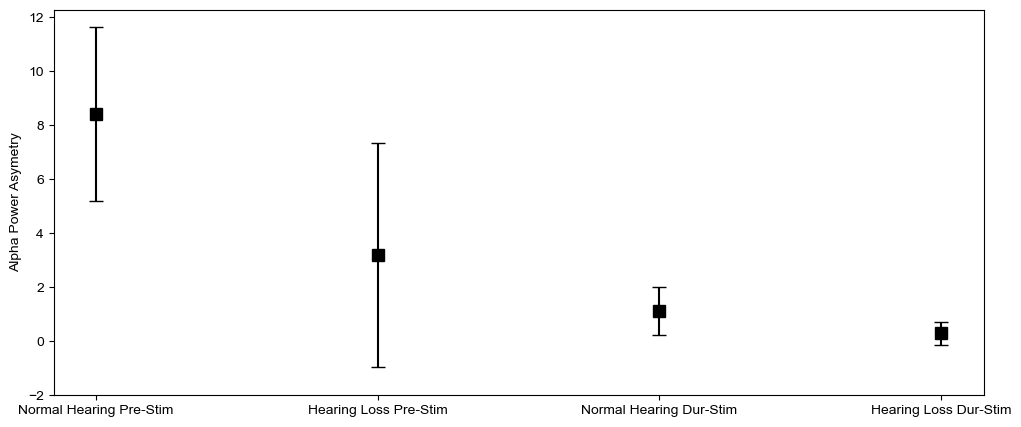

In [25]:
# x_labels = ["Normal Hearing Pre-Stim", "Normal Hearing Dur-Stim", "Hearing Loss Pre-Stim", "Hearing Loss Dur-Stim"] 
x_labels = ["Normal Hearing Pre-Stim", "Hearing Loss Pre-Stim", "Normal Hearing Dur-Stim", "Hearing Loss Dur-Stim"] 
x_positions = np.arange(len(x_labels))

# mean_changes = [np.mean(NH_assymetry_PO_pre), np.mean(NH_assymetry_PO_dur),np.mean(HL_assymetry_PO_pre), np.mean(HL_assymetry_PO_dur)]
mean_changes = [np.mean(NH_assymetry_CT_pre), np.mean(HL_assymetry_CT_pre),np.mean(NH_assymetry_CT_dur), np.mean(HL_assymetry_CT_dur)]

# sem_values = [NH_assymetry_PO_pre_sem, NH_assymetry_PO_dur_sem, HL_assymetry_PO_pre_sem, HL_assymetry_PO_dur_sem]
sem_values = [NH_assymetry_CT_pre_sem, HL_assymetry_CT_pre_sem, NH_assymetry_CT_dur_sem, HL_assymetry_CT_dur_sem]

plt.figure(figsize=(12, 5))
plt.errorbar(x_positions, mean_changes, yerr=sem_values, fmt='s', capsize=5, color='black', markersize=8)
plt.xticks(x_positions, x_labels)  
plt.yticks([-2,0,2,4,6,8,10, 12])

plt.ylabel("Alpha Power Asymetry")
# plt.title("Change in Energy during stimulus")
plt.savefig(foldername+'alpha_power_assymetry_CT.pdf', format='pdf')
plt.show()

In [35]:
from scipy.stats import ttest_ind_from_stats

t_stat_pre, p_value_pre = ttest_ind_from_stats(np.mean(NH_assymetry_CT_pre), NH_assymetry_CT_pre_var**0.5, len(NH_subjects), np.mean(HL_assymetry_CT_pre), HL_assymetry_CT_pre_var**0.5, len(HL_subjects), equal_var=False)
t_stat_dur, p_value_dur = ttest_ind_from_stats(np.mean(NH_assymetry_CT_dur), NH_assymetry_CT_dur_var**0.5, len(NH_subjects), np.mean(HL_assymetry_CT_dur), HL_assymetry_CT_dur_var**0.5, len(HL_subjects), equal_var=False)

In [36]:
print(p_value_pre, p_value_dur)

0.3414612006526122 0.489410176920705
